Consctruct the classifier with the best parameters and make analyses 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [93]:
import pickle
import numpy as np
import pandas as pd
from pymongo import MongoClient

import seaborn as sns
import matplotlib.pyplot as plt

import smote_variants as sv
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import utils
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV

from utils import *

In [90]:
with open('/Users/bogao/DataFiles/new landscape/data/multiclass_reduced_labels.pkl', 'rb') as fi:
    data = pickle.load(fi)

In [39]:
param_grid = {'L': [3, 5, 7],
              'n_neighbors': [3, 5, 7],
              'proportion': [0.1, 0.5, 1, 1,5, 2],
              'theta': [0.1, 1, 2],
              'n_jobs': [18]}

In [23]:
param_grid = {'L': [3, 5],
              'n_neighbors': [3],
              'proportion': [0.1],
              'theta': [0.1],
              'n_jobs': [18]}

## grid search smote params

In [ ]:
results = []
for param in ParameterGrid(param_grid):
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    r = cross_validation(d, t,
                            spliter = StratifiedShuffleSplit(n_splits=5, test_size=0.3),
                            sampler = sv.MulticlassOversampling(sv.ProWSyn(**param)),
                            model = RandomForestClassifier(n_estimators=1000, n_jobs=18, random_state=514))
    results.append(r)

In [46]:
mtr = [[],[],[],[]]
n = 1
for res  in results:
    acc, pre, rec, f1 = 0, 0, 0, 0
    for r in res:
        acc += metrics.accuracy_score(r[0], r[1])
        pre += metrics.precision_score(r[0], r[1], average='macro')
        rec += metrics.recall_score(r[0], r[1], average='macro')
        f1 += metrics.f1_score(r[0], r[1], average='macro')
    
    mtr[0].append(acc/n)
    mtr[1].append(pre/n)
    mtr[2].append(rec/n)
    mtr[3].append(f1/n)

    
    
pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]}).sort_values('f1', ascending=False)[:30]

,accuracy,precision,recall,f1
32,2.766162,2.113994,2.217467,2.123667
137,2.768655,2.099182,2.210611,2.119163
152,2.769368,2.110411,2.199777,2.116820
138,2.767943,2.112713,2.208971,2.116783
113,2.756901,2.102087,2.209870,2.114583
149,2.773998,2.094002,2.207072,2.113607
123,2.762422,2.111811,2.220120,2.112388
81,2.764025,2.120286,2.194670,2.111347
141,2.782547,2.103828,2.201177,2.109750
2,2.779875,2.101507,2.192350,2.109242


In [81]:
mtr = [[],[],[],[]]

f = results[32]
for r in f:
    mtr[0].append(metrics.accuracy_score(r[0], r[1]))
    mtr[1].append(metrics.precision_score(r[0], r[1], average='macro'))
    mtr[2].append(metrics.recall_score(r[0], r[1], average='macro'))
    mtr[3].append(metrics.f1_score(r[0], r[1], average='macro'))

pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]})

,accuracy,precision,recall,f1
0,0.545503,0.418116,0.429638,0.416059
1,0.549599,0.407222,0.432310,0.411386
2,0.553339,0.421801,0.446454,0.426313
3,0.555298,0.432746,0.451179,0.433122
4,0.562422,0.434110,0.457886,0.436787


In [41]:
with open('/Users/bogao/DataFiles/new landscape/data/classifier_smote_grid.pkl', 'wb') as fo:
    pickle.dump(results, fo)

## Best params

In [43]:
list(ParameterGrid(param_grid))[32]

{'L': 3, 'n_jobs': 18, 'n_neighbors': 5, 'proportion': 5, 'theta': 2}

In [45]:
list(ParameterGrid(param_grid))[137]

{'L': 7, 'n_jobs': 18, 'n_neighbors': 5, 'proportion': 1, 'theta': 2}

In [59]:
ParameterGrid(param_grid)[138]

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

## RF hyper params

In [56]:
param_grid = {'n_estimators': [500, 1000, 1500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 5, 10]
             }

In [ ]:
rf_search = []
sp = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
sm = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2))
rf = RandomForestClassifier(random_state=1234, warm_start=True, oob_score=True, random_state=514)

# random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
#                                    n_iter=100, cv=1,  random_state=1234, n_jobs=18)

for i in range(3):
    
    random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
                                   n_iter=100, cv=sp,  random_state=1234, n_jobs=18)
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    
    X_samp, y_samp = sm.sample(d, t)
        
    random_search.fit(X_samp, y_samp)    
    
    rf_search.append(random_search)

In [66]:
for r in rf_search:
    print(r.best_params_)
    print(r.estimator.oob_score)

{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
True
{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
True
{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
True


## Further search

In [67]:
param_grid = {'n_estimators': [1500, 2000, 2500],
              'max_depth': [30, 40, 50]
             }

In [ ]:
rf_search_2 = []
# sp = StratifiedShuffleSplit(n_splits=5, test_size=0.3)
sm = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2))
rf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=514)

# random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
#                                    n_iter=100, cv=1,  random_state=1234, n_jobs=18)

for i in range(3):
    
    random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
                                   n_iter=5, cv=5,  n_jobs=18, verbose=1)
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    
    X_samp, y_samp = sm.sample(d, t)
        
    random_search.fit(X_samp, y_samp)    
    
    rf_search_2.append(random_search)

In [72]:
for r in rf_search_2:
    print(r.best_params_)
    print(r.estimator.oob_score)

{'n_estimators': 2500, 'max_depth': 30}
True
{'n_estimators': 2000, 'max_depth': 40}
True
{'n_estimators': 2000, 'max_depth': 50}
True


## Build a formal classifier

In [ ]:
formal_results = []
for i in range(5):
    
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    result = cross_validation(d, t,
                            spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.3),
                            sampler = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2)),
                            model = RandomForestClassifier(n_estimators=2000, n_jobs=18, max_depth=30, random_state=514))
    
    formal_results.append(result)

[array([18,  5,  0, ..., 26, 26,  5]), array([18,  5, 14, ..., 26,  9,  5])]

In [77]:
mtr = [[],[],[],[]]
n = 1
for res  in formal_results:
    acc, pre, rec, f1 = 0, 0, 0, 0
    for r in res:
        acc += metrics.accuracy_score(r[0], r[1])
        pre += metrics.precision_score(r[0], r[1], average='macro')
        rec += metrics.recall_score(r[0], r[1], average='macro')
        f1 += metrics.f1_score(r[0], r[1], average='macro')
    
    mtr[0].append(acc/n)
    mtr[1].append(pre/n)
    mtr[2].append(rec/n)
    mtr[3].append(f1/n)

    
    
pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]}).sort_values('f1', ascending=False)

,accuracy,precision,recall,f1
1,0.544435,0.413481,0.441112,0.419577
0,0.552271,0.412902,0.427473,0.414400
3,0.550668,0.407226,0.425066,0.408340
4,0.544435,0.402031,0.413346,0.398149
2,0.539092,0.383710,0.405828,0.388240


### default rf

In [ ]:
default_rf_results = []
for i in range(5):
    
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    result = cross_validation(d, t,
                            spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.3),
                            sampler = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2)),
                            model = RandomForestClassifier(n_estimators=2000, n_jobs=18, random_state=514))
    
    default_rf_results.append(result)

In [79]:
mtr = [[],[],[],[]]
n = 1
for res  in default_rf_results:
    acc, pre, rec, f1 = 0, 0, 0, 0
    for r in res:
        acc += metrics.accuracy_score(r[0], r[1])
        pre += metrics.precision_score(r[0], r[1], average='macro')
        rec += metrics.recall_score(r[0], r[1], average='macro')
        f1 += metrics.f1_score(r[0], r[1], average='macro')
    
    mtr[0].append(acc/n)
    mtr[1].append(pre/n)
    mtr[2].append(rec/n)
    mtr[3].append(f1/n)

    
    
pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]}).sort_values('f1', ascending=False)

,accuracy,precision,recall,f1
0,0.555120,0.425131,0.445036,0.426144
2,0.548175,0.425085,0.443838,0.425807
3,0.555120,0.418391,0.444798,0.424185
1,0.547462,0.417764,0.442494,0.422950
4,0.554942,0.417496,0.434491,0.417523


## Results

In [91]:
evaluate_classes(results[32][4], names=data['name'])

,Label,Precision,Recall,F1-score
6,Breast Intraductal carcinoma,0.720000,0.720000,0.720000
9,Colon Adenocarcinoma,0.688805,0.736308,0.711765
1,Brain Glioma,0.720450,0.678445,0.698817
8,Cerebellum Medulloblastoma,0.631664,0.774257,0.695730
22,Ovary Carcinoma,0.688492,0.653484,0.670531
13,Kidney Clear cell adenocarcinoma,0.575130,0.795699,0.667669
24,Prostate Adenocarcinoma,0.557756,0.614545,0.584775
7,Breast Lobular carcinoma,0.464646,0.766667,0.578616
11,Colon Adenoma,0.588235,0.526316,0.555556
25,Skin Melanoma,0.591241,0.506250,0.545455


In [241]:
def plot_confusion_matrix(result, names, scale=False):
    cm = metrics.confusion_matrix(result[0], result[1])
    if scale == True:
        cm = cm / cm.sum(axis=1, keepdims=True)
    
    plt.figure(figsize=(11,10))
    ax = sns.heatmap(cm , cmap="YlGnBu", xticklabels=names, yticklabels=names)
    blim, tlim = ax.get_ylim()
    ax = ax.set_ylim(blim+0.5, tlim-0.5)

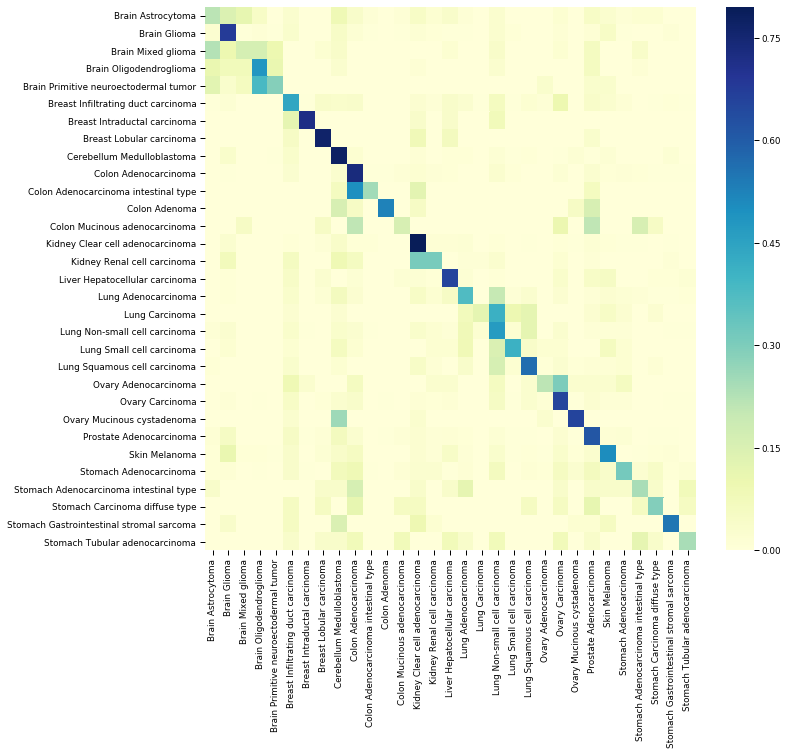

In [232]:
plot_confusion_matrix(results[32][4], data['name'], True)
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-subtype.pdf',bbox_inches='tight')

## Organs

In [102]:
result_organ = organ_labels(results[32][4], data['name'])

In [103]:
evaluate_global([result_organ])

-------- 0 --------
Accuracy: 0.6618
Precision: 0.6211
Recall: 0.6447
F1: 0.6277


In [104]:
evaluate_classes(result_organ, get_organs(data['name']))

,Label,Precision,Recall,F1-score
0,Brain,0.786003,0.717445,0.750161
6,Lung,0.752408,0.694840,0.722479
3,Colon,0.689420,0.738574,0.713151
2,Cerebellum,0.631664,0.774257,0.695730
7,Ovary,0.680887,0.666110,0.673418
4,Kidney,0.598326,0.760638,0.669789
8,Prostate,0.557756,0.614545,0.584775
1,Breast,0.600000,0.534454,0.565333
9,Skin,0.591241,0.506250,0.545455
5,Liver,0.421965,0.657658,0.514085


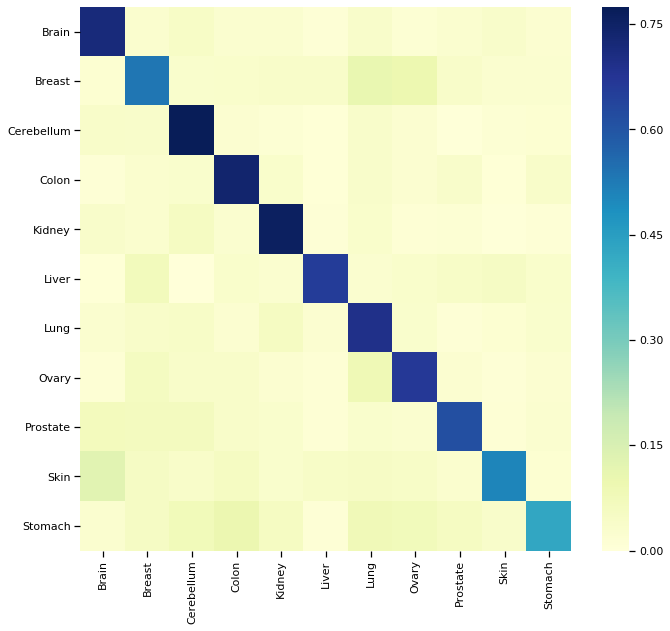

In [253]:
sns.set_context('notebook')
plot_confusion_matrix(result_organ, get_organs(data['name']), True)
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-organ.pdf',bbox_inches='tight')

## performance vs number

### subtypes

In [114]:
label_counts = pd.DataFrame(np.unique(data['label'], return_counts=True)).transpose().rename(columns ={0:'Label', 1:'Count'})

In [117]:
dd = pd.merge(evaluate_classes(results[32][4], names=data['name']), label_counts, how='left', on='Label')

In [135]:
dd

,Label,Precision,Recall,F1-score,Count,Log
0,Breast Intraductal carcinoma,0.720000,0.720000,0.720000,82,4.406719
1,Colon Adenocarcinoma,0.688805,0.736308,0.711765,1643,7.404279
2,Brain Glioma,0.720450,0.678445,0.698817,1887,7.542744
3,Cerebellum Medulloblastoma,0.631664,0.774257,0.695730,1682,7.427739
4,Ovary Carcinoma,0.688492,0.653484,0.670531,1770,7.478735
5,Kidney Clear cell adenocarcinoma,0.575130,0.795699,0.667669,930,6.835185
6,Prostate Adenocarcinoma,0.557756,0.614545,0.584775,916,6.820016
7,Breast Lobular carcinoma,0.464646,0.766667,0.578616,201,5.303305
8,Colon Adenoma,0.588235,0.526316,0.555556,63,4.143135
9,Skin Melanoma,0.591241,0.506250,0.545455,1068,6.973543


In [134]:
dd['Log'] = np.log(dd['Count'].to_list())

In [139]:
dd['sqt'] = np.sqrt(dd['Count'].to_list())

In [173]:
dd['tag'] = ''
dd.loc[12,'tag'] = dd.loc[12,'Label']
dd.loc[15,'tag'] = dd.loc[15,'Label']
dd.loc[17,'tag'] = dd.loc[17,'Label']


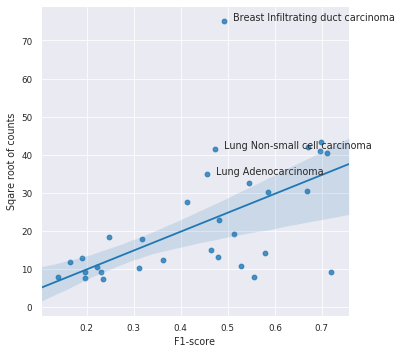

In [243]:
with sns.axes_style("darkgrid"):
    ax = sns.lmplot(data=dd, x='F1-score', y='sqt', robust=True )
    sns.set_context("paper")
    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(dd['F1-score'], dd['sqt'], dd['tag'], plt.gca()) 
    plt.ylabel('Sqare root of counts')
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance_vs_count_subtype.pdf',bbox_inches='tight')

### organs

In [201]:
label2organ = {}
for v in data['name']:
    label2organ[v] = v.split(' ')[0]
org_label = [label2organ[x] for x in data['label']]

In [206]:
organ_counts = pd.DataFrame(np.unique(org_label, return_counts=True)).transpose().rename(columns ={0:'Label', 1:'Count'})

In [210]:
oo = pd.merge(evaluate_classes(result_organ, get_organs(data['name'])), organ_counts, how='left', on='Label')

In [215]:
oo['sqt'] = np.sqrt(oo['Count'].to_list())

In [221]:
oo['tag'] = ''
oo.loc[7,'tag'] = oo.loc[7,'Label']
oo.loc[1,'tag'] = oo.loc[1,'Label']

In [222]:
oo

,Label,Precision,Recall,F1-score,Count,sqt,tag
0,Brain,0.786003,0.717445,0.750161,2714,52.096065,
1,Lung,0.752408,0.694840,0.722479,3748,61.220911,Lung
2,Colon,0.689420,0.738574,0.713151,1821,42.673177,
3,Cerebellum,0.631664,0.774257,0.695730,1682,41.012193,
4,Ovary,0.680887,0.666110,0.673418,1998,44.698993,
5,Kidney,0.598326,0.760638,0.669789,1253,35.397740,
6,Prostate,0.557756,0.614545,0.584775,916,30.265492,
7,Breast,0.600000,0.534454,0.565333,5940,77.071395,Breast
8,Skin,0.591241,0.506250,0.545455,1068,32.680269,
9,Liver,0.421965,0.657658,0.514085,371,19.261360,


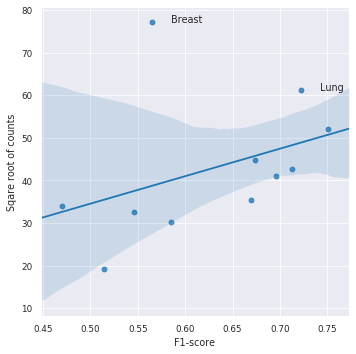

In [249]:
with sns.axes_style("darkgrid"):
    ax = sns.lmplot(data=oo, x='F1-score', y='sqt')
    sns.set_context("paper")

    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(oo['F1-score'], oo['sqt'], oo['tag'], plt.gca()) 
    plt.ylabel('Sqare root of counts')
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance_vs_count_organ.pdf',bbox_inches='tight')

In [189]:
len(result_organ[0])

5615

In [191]:
results[32][4][0].shape

(5615,)

In [199]:
data['label'].shape

(22671,)

In [198]:
data

{'data': array([[ 0.    ,  0.    ,  0.014 , ..., -3.9349, -3.9349, -3.9349],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ..., -1.2938, -1.2938, -1.2938],
        [ 0.7118,  0.7118,  0.7118, ...,  0.    ,  0.    ,  0.    ]]),
 'label': array(['Ovary Carcinoma', 'Ovary Carcinoma', 'Ovary Carcinoma', ...,
        'Ovary Carcinoma', 'Ovary Carcinoma', 'Ovary Carcinoma'],
       dtype=object),
 'target': array([22, 22, 22, ..., 22, 22, 22]),
 'name': array(['Brain Astrocytoma', 'Brain Glioma', 'Brain Mixed glioma',
        'Brain Oligodendroglioma', 'Brain Primitive neuroectodermal tumor',
        'Breast Infiltrating duct carcinoma',
        'Breast Intraductal carcinoma', 'Breast Lobular carcinoma',
        'Cerebellum Medulloblastoma', 'Colon Adenocarcinoma',
        'Colon Adeno